In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np
from numpy import load
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Load Dataset

In [2]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [3]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

In [4]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

## Forecasting Several Steps Ahead

If we want to predict the next 10 values, instead of just 1, we can modify our previous model to predict the next 10 values. We first need to load the dataset that has sequences with 9 more time steps.

In [5]:
n_steps = 50
series = load('univariate-time-series-multi-step.npy')

X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [6]:
#Improve upon this model with your own model

model = keras.models.Sequential([
    keras.layers.LSTM(100,input_shape=[50, 1]),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0769 - val_loss: 0.0572
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0481 - val_loss: 0.0392
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0325 - val_loss: 0.0274
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0267 - val_loss: 0.0257
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0246 - val_loss: 0.0217
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0225 - val_loss: 0.0235
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0194 - val_loss: 0.0173
Epoch 8/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0160 - val_loss: 0.0143
Epoch 9/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0147 - val_loss: 0.0136
Epoch 10/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0138 - val_loss: 0.0137

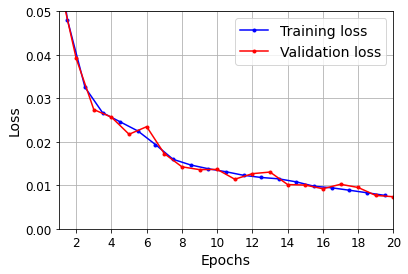

In [7]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

Now let's predict the next 10 values:

In [8]:
series = load('univariate-time-series-multi-step-test.npy')
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

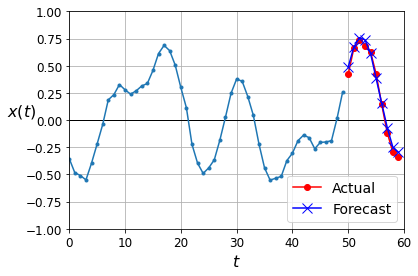

In [9]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [10]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0081


0.008128618821501732